# FDTD tidy3d

gdsfactory simulation plugin for tidy3d
[tidy3D is a FDTD web based software](https://simulation.cloud/)

## Materials

tidy3d provides you with a material database of dispersive materials.

In [1]:
# basic ipython configuration (reload source code automatically and plots inline)
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory.simulation as sim

[16:39:26] INFO     NumExpr defaulting to 2 threads.                             ]8;id=112636;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/numexpr/utils.py\utils.py]8;;\:]8;id=643816;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/numexpr/utils.py#159\159]8;;\

2022-05-20 16:39:27.843 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.7.1


2022-05-20 16:39:29.247 | INFO     | gdsfactory.simulation.gtidy3d:<module>:52 - Tidy3d '1.3.2' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d']


Text(0, 0.5, 'n')

<Figure size 432x288 with 1 Axes>

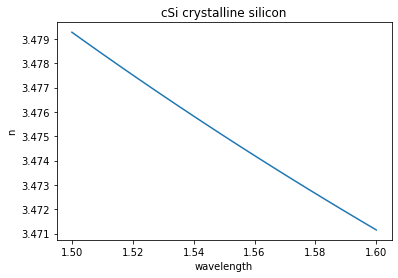

In [2]:
nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength
eps_complex = gt.materials.material_library["cSi"]["Li1993_293K"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("cSi crystalline silicon")
plt.xlabel("wavelength")
plt.ylabel("n")

Text(0, 0.5, 'n')

<Figure size 432x288 with 1 Axes>

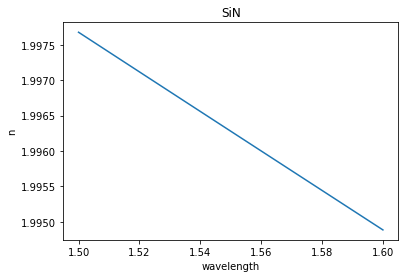

In [3]:
eps_complex = gt.materials.material_library["Si3N4"]["Luke2015"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiN")
plt.xlabel("wavelength")
plt.ylabel("n")

Text(0, 0.5, 'n')

<Figure size 432x288 with 1 Axes>

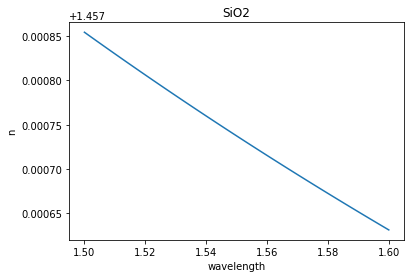

In [4]:
eps_complex = gt.materials.material_library["SiO2"]["Horiba"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiO2")
plt.xlabel("wavelength")
plt.ylabel("n")

## get_simulation

You can run `get_simulation` to convert a gdsfactory planar Component into a tidy3d simulation and make sure the simulation looks correct before running it

`get_simulation` also has a `plot_modes` option so you can make sure you are monitoring the desired mode.

### 2D

2D planar simulations run faster than 3D. When running in 2D we don't consider the component thickness in the z dimension

2022-05-20 16:39:29.912 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0, zmax = 0


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


[16:39:30] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=156486;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=840678;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 2 Axes>

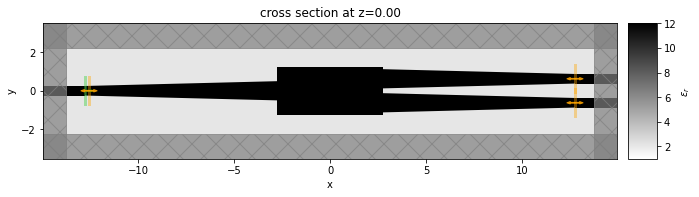

In [5]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c, is_3d=False)
fig = gt.plot_simulation(s)

### 3D

By default all simulations run in 3D unless indicated otherwise with the `is_3d` argument.
3D simulations still run quite fast thanks to the GPU solver on the server side.

In [6]:
help(gt.get_simulation)

Help on cython_function_or_method in module gdsfactory.simulation.gtidy3d.get_simulation:

get_simulation(component: Union[str, Callable[..., gdsfactory.component.Component], gdsfactory.component.Component, Dict[str, Any]], port_extension: Optional[float] = 4.0, layer_stack: gdsfactory.tech.LayerStack = LayerStack(layers={'core': LayerLevel(layer=(1, 0), thickness=0.22, zmin=0.0, material='si', sidewall_angle=0), 'clad': LayerLevel(layer=(111, 0), thickness=None, zmin=0.0, material='sio2', sidewall_angle=0), 'slab150': LayerLevel(layer=(2, 0), thickness=0.15, zmin=0.0, material='si', sidewall_angle=0), 'slab90': LayerLevel(layer=(3, 0), thickness=0.09, zmin=0.0, material='si', sidewall_angle=0), 'nitride': LayerLevel(layer=(34, 0), thickness=0.35, zmin=0.32, material='sin', sidewall_angle=0), 'ge': LayerLevel(layer=(5, 0), thickness=0.5, zmin=0.22, material='ge', sidewall_angle=0), 'via_contact': LayerLevel(layer=(40, 0), thickness=1.1, zmin=0.09, material='Aluminum', sidewall_angle=0)

2022-05-20 16:39:30.669 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


           INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=227232;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=683632;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 4 Axes>

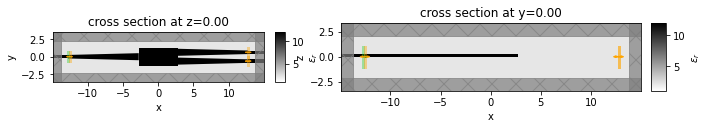

In [7]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-05-20 16:39:31.392 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


[16:39:31] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=951850;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=877944;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 4 Axes>

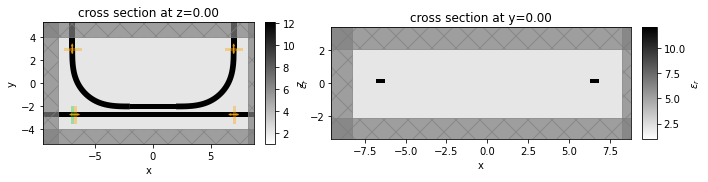

In [8]:
c = gf.components.coupler_ring()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-05-20 16:39:32.649 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


[16:39:32] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=147679;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=845670;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 4 Axes>

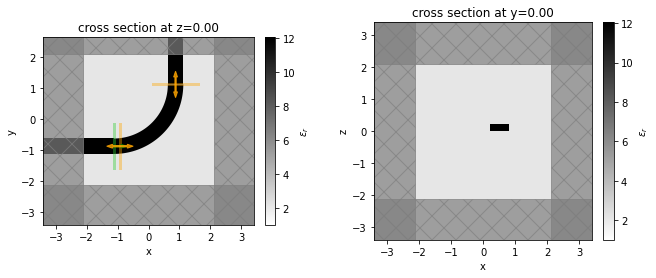

In [9]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-05-20 16:39:33.452 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


[16:39:33] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=275210;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=860093;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 4 Axes>

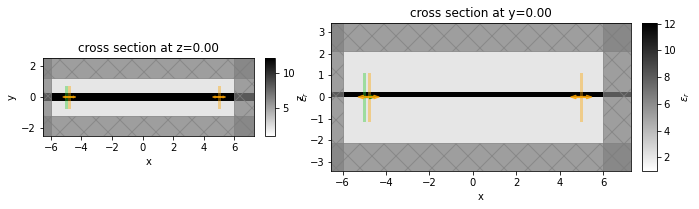

In [10]:
c = gf.components.straight()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-05-20 16:39:34.100 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


[16:39:34] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=101780;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=874194;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

Effective index of computed modes:  [[2.46068402 1.78938873]]


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

<Figure size 864x864 with 8 Axes>

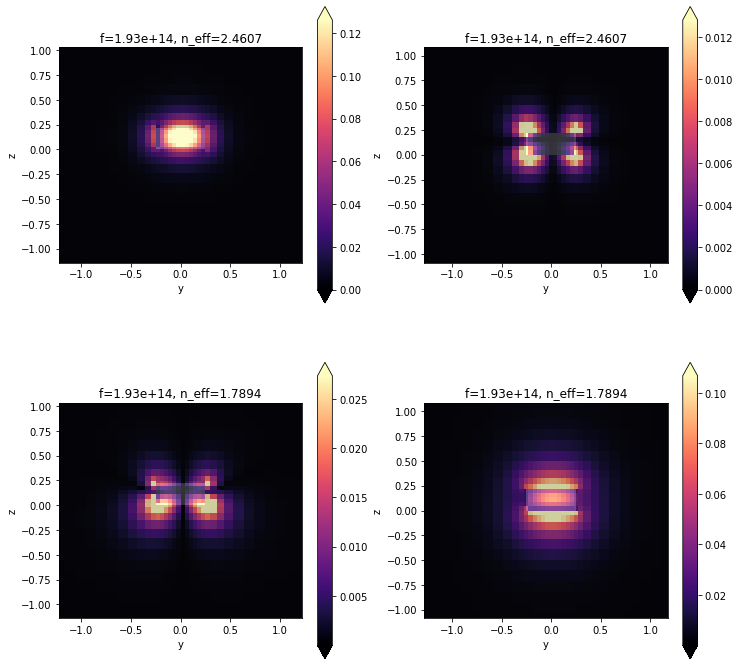

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 792x288 with 4 Axes>

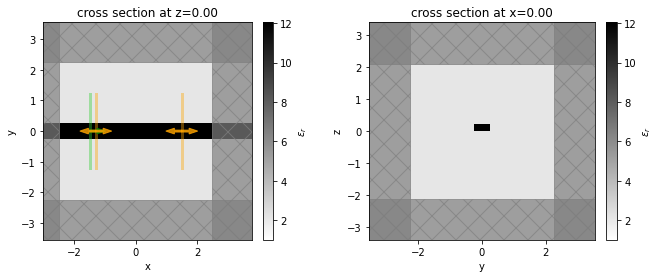

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web
import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt

c = gf.components.straight(length=3)
sim = gt.get_simulation(c, plot_modes=True, port_margin=1, ymargin=1)
fig = gt.plot_simulation_xz(sim)

2022-05-20 16:39:36.626 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:36.633 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (3, 0), 3.47, index = 3.470, thickness = 0.09, zmin = 0.0, zmax = 0.09


[16:39:36] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=535057;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=427539;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

[16:39:37] WARNING  Mode field at frequency index 0, mode index 1 does not ]8;id=254545;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py\mode_solver.py]8;;\:]8;id=595436;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py#451\451]8;;\
                    decay at the plane boundaries.                                           

Effective index of computed modes:  [[2.59349505 2.14610468]]


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

<Figure size 864x864 with 8 Axes>

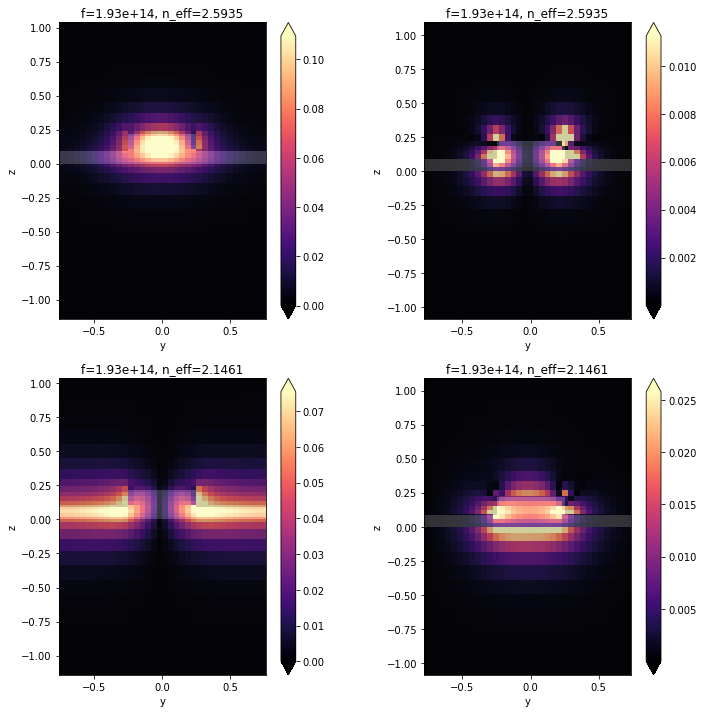

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 792x288 with 4 Axes>

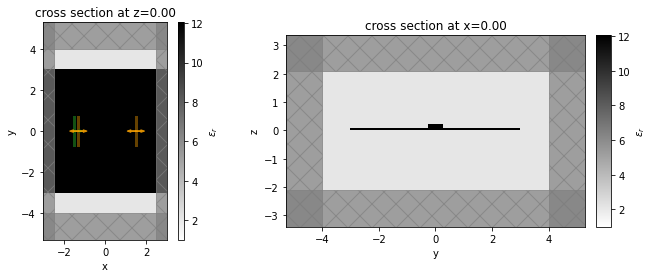

In [12]:
c = gf.components.straight_rib(length=3)
sim = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(sim)

2022-05-20 16:39:39.109 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:39.114 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (34, 0), 2.0, index = 2.000, thickness = 0.35, zmin = 0.32, zmax = 0.6699999999999999


[16:39:39] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=959737;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=876428;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

Effective index of computed modes:  [[2.40706607 1.7567328 ]]


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

<Figure size 864x864 with 8 Axes>

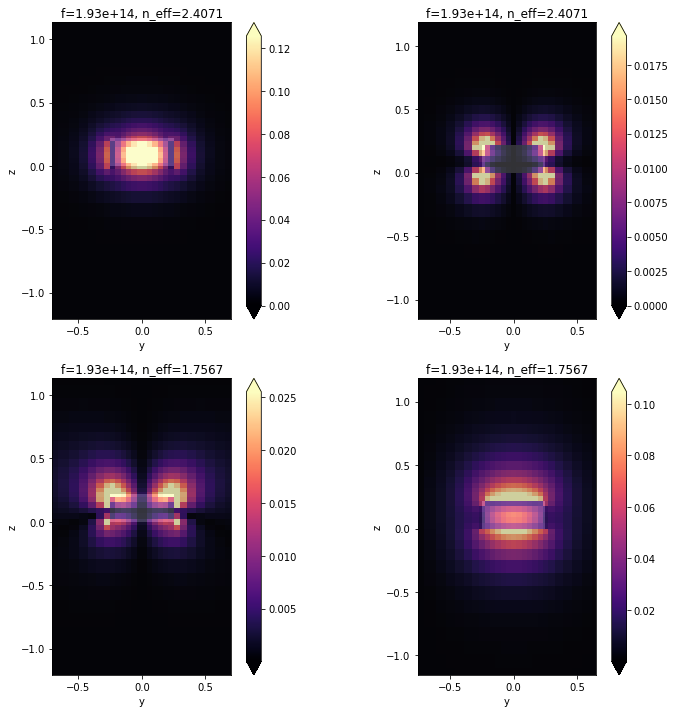

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 792x288 with 4 Axes>

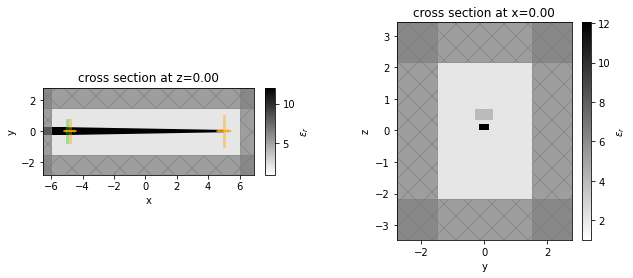

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory.simulation as sim
from gdsfactory.components.taper import taper_sc_nc

c = taper_sc_nc(length=10)
s = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(s)

Lets make sure the mode also looks correct on the Nitride side

2022-05-20 16:39:41.319 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:41.324 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (34, 0), 2.0, index = 2.000, thickness = 0.35, zmin = 0.32, zmax = 0.6699999999999999


[16:39:41] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=534408;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=581023;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

           WARNING  Mode field at frequency index 0, mode index 1 does not ]8;id=601903;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py\mode_solver.py]8;;\:]8;id=367584;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py#451\451]8;;\
                    decay at the plane boundaries.                                           

Effective index of computed modes:  [[1.61925395 1.54080044]]


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and wi

<Figure size 864x864 with 8 Axes>

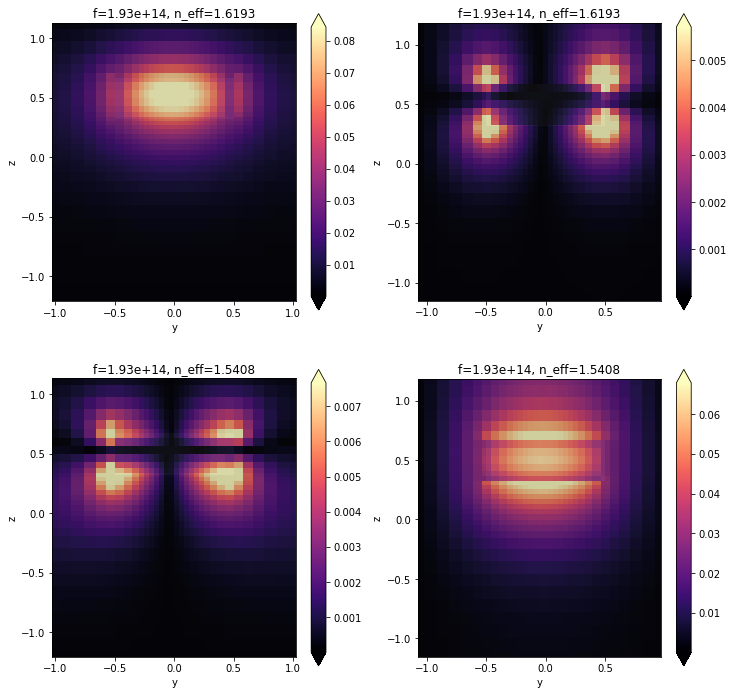

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 792x288 with 4 Axes>

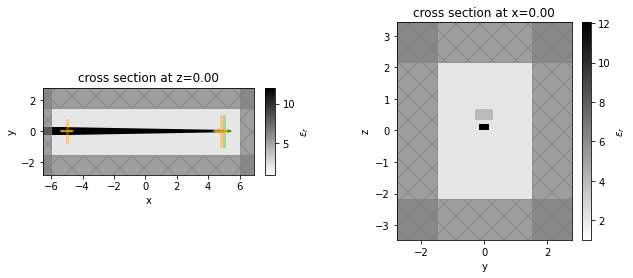

In [14]:
c = taper_sc_nc(length=10)
s = gt.get_simulation(c, port_source_name="o2", plot_modes=True)
fig = gt.plot_simulation_xz(s)

2022-05-20 16:39:43.840 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


bend_euler


[16:39:43] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=81553;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=534019;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

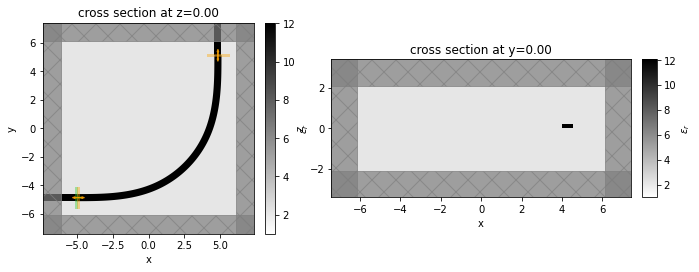

2022-05-20 16:39:44.750 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


bend_s


[16:39:44] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=21338;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=86438;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

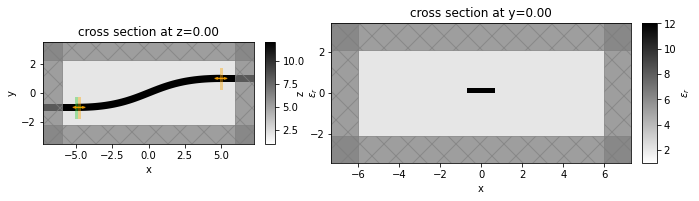

2022-05-20 16:39:45.444 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


coupler


[16:39:45] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=314236;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=242290;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

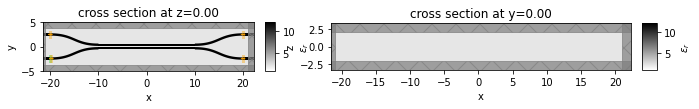

2022-05-20 16:39:46.430 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


coupler_ring


<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

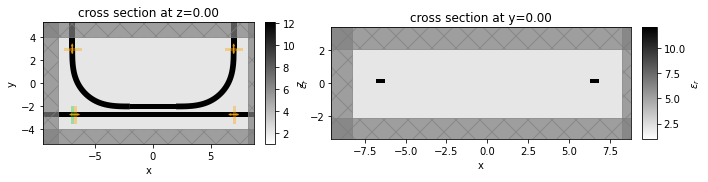

2022-05-20 16:39:48.759 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:48.772 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


crossing


[16:39:48] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=747193;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=807183;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

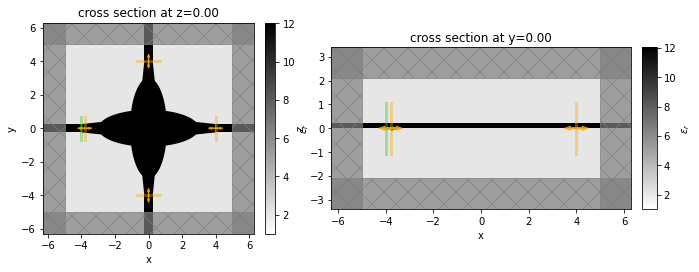

2022-05-20 16:39:49.877 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


mmi1x2


<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

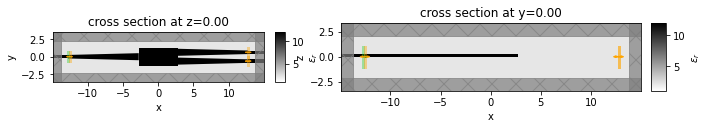

2022-05-20 16:39:50.693 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


mmi2x2


[16:39:50] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=51898;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=746685;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

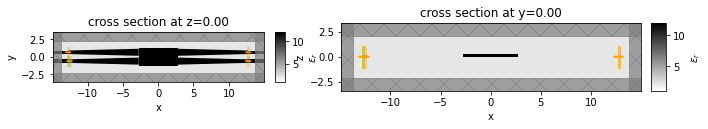

2022-05-20 16:39:51.404 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


taper


[16:39:51] INFO     Auto meshing using wavelength 1.5500 defined from        ]8;id=260935;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=961254;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

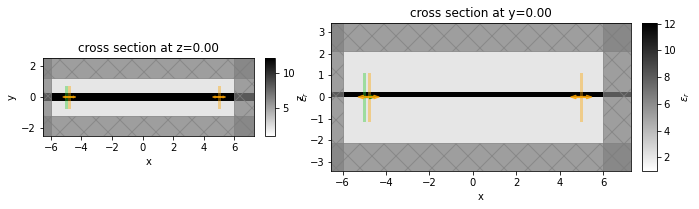

2022-05-20 16:39:51.989 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


straight


<Figure size 432x288 with 0 Axes>

<Figure size 792x288 with 4 Axes>

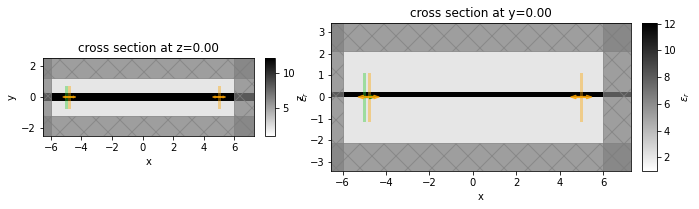

In [15]:
components = [
    "bend_euler",
    "bend_s",
    "coupler",
    "coupler_ring",
    "crossing",
    "mmi1x2",
    "mmi2x2",
    "taper",
    "straight",
]

for component_name in components:
    print(component_name)
    plt.figure()
    c = gf.components.cells[component_name]()
    s = gt.get_simulation(c)
    fig = gt.plot_simulation(s)

## write_sparameters

You can write Sparameters from a simulation as well as a group of simulations in paralell.

Each Sparameter runs on a different thread as it needs to monitor each job sent to the tidy3d server.

```python
c = gf.components.straight()
s = gt.get_sparameters(c)
```

```python
for component_name, component_factory in gf.components._factory_passives.items():
    c = component_factory()
    s = gt.get_sparameters(c)

```

2022-05-20 16:39:52.719 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


<Figure size 792x288 with 4 Axes>

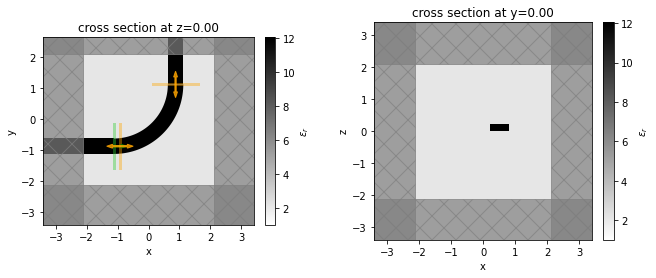

In [16]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

For a 2 port reciprocal passive component you can always asume `s21 = s12`

Another approximation you can make for planar devices is that `s11 = s22`, which saves 1 extra simulation

This approximation only works well for straight and bends

we call this `1x1` port symmetry

2022-05-20 16:39:53.805 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:148 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/bend_circular_706a361a_657056ae.csv')


<Figure size 432x288 with 1 Axes>

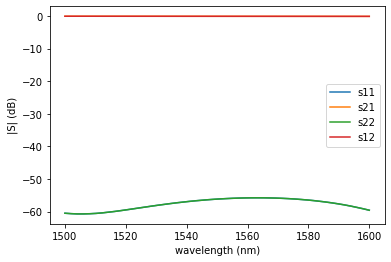

In [17]:
df = gt.write_sparameters_1x1(c)
sim.plot.plot_sparameters(df)

<Figure size 432x288 with 1 Axes>

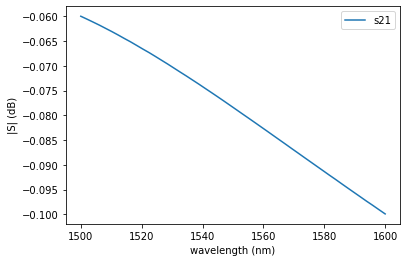

In [18]:
sim.plot.plot_sparameters(df, keys=("s21m",))

2022-05-20 16:39:54.238 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:239 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 792x288 with 4 Axes>

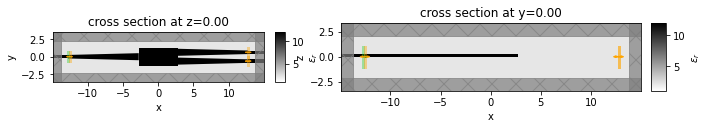

2022-05-20 16:39:55.184 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:148 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_657056ae.csv')


In [19]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)
df = gt.write_sparameters(c)

<Figure size 432x288 with 1 Axes>

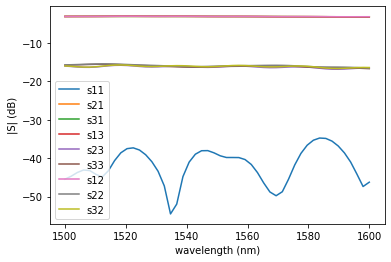

In [20]:
sim.plot.plot_sparameters(df)

<Figure size 432x288 with 1 Axes>

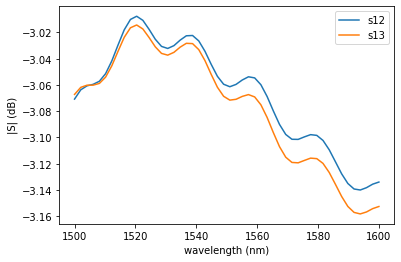

In [21]:
sim.plot.plot_sparameters(df, keys=("s12m", "s13m"))

## write_sparameters_batch

You can also send a batch of component simulations in paralell to the tidy3d server.


In [22]:
jobs = [dict(component=gf.c.straight(length=1.11 + i)) for i in [1, 2]]
dfs = gt.write_sparameters_batch_1x1(jobs)

2022-05-20 16:39:55.721 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:148 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_06d431c8_657056ae.csv')


2022-05-20 16:39:55.726 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:148 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_0437acf8_657056ae.csv')


<Figure size 432x288 with 1 Axes>

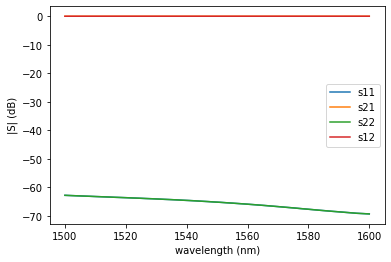

In [23]:
df1 = dfs[0]
sim.plot.plot_sparameters(df1)

<Figure size 432x288 with 1 Axes>

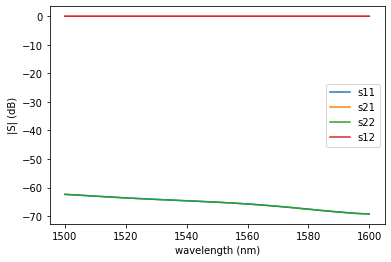

In [24]:
df2 = dfs[1]
sim.plot.plot_sparameters(df2)

## get_simulation_grating_coupler

You can also expand the planar component simulations to simulate an out-of-plane grating coupler.

The following simulations run in 2D but can also run in 3D.

In [25]:
help(gt.get_simulation_grating_coupler)

Help on function get_simulation_grating_coupler in module gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:

get_simulation_grating_coupler(component: gdsfactory.component.Component, port_extension: Optional[float] = 15.0, layer_stack: gdsfactory.tech.LayerStack = LayerStack(layers={'core': LayerLevel(layer=(1, 0), thickness=0.22, zmin=0.0, material='si', sidewall_angle=0), 'clad': LayerLevel(layer=(111, 0), thickness=None, zmin=0.0, material='sio2', sidewall_angle=0), 'slab150': LayerLevel(layer=(2, 0), thickness=0.15, zmin=0.0, material='si', sidewall_angle=0), 'slab90': LayerLevel(layer=(3, 0), thickness=0.09, zmin=0.0, material='si', sidewall_angle=0), 'nitride': LayerLevel(layer=(34, 0), thickness=0.35, zmin=0.32, material='sin', sidewall_angle=0), 'ge': LayerLevel(layer=(5, 0), thickness=0.5, zmin=0.22, material='ge', sidewall_angle=0), 'via_contact': LayerLevel(layer=(40, 0), thickness=1.1, zmin=0.09, material='Aluminum', sidewall_angle=0), 'metal1': LayerLevel(layer

In [26]:
import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import numpy as np
import matplotlib.pyplot as plt

2022-05-20 16:39:56.310 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:56.396 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


[16:39:56] INFO     Auto meshing using wavelength 1.5000 defined from        ]8;id=846760;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=254325;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 2 Axes>

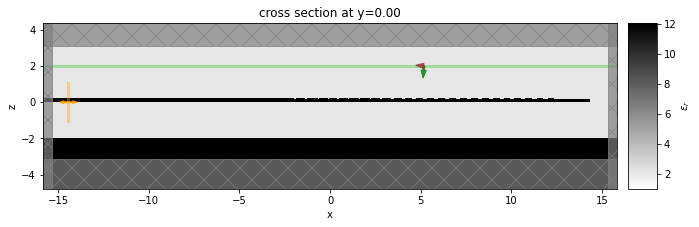

In [27]:
c = (
    gf.components.grating_coupler_elliptical_lumerical()
)  # inverse design grating apodized
fiber_angle_deg = 5
s = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(s)

<Figure size 432x288 with 1 Axes>

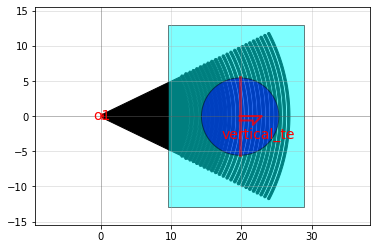

<Figure size 432x288 with 1 Axes>

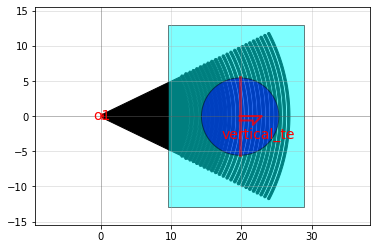

In [28]:
c.plot()

Lets compare the xtolerance of a constant pitch vs an apodized grating.

We run simulations in 2D for faster.

Lets simulate 2 different grating couplers:

- apodized inverse design example from lumerical website (5 degrees fiber angle)
- constant pitch grating from gdsfactory generic PDK (20 degrees fiber angle)

2022-05-20 16:39:57.887 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:57.980 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


[16:39:58] INFO     Auto meshing using wavelength 1.5000 defined from        ]8;id=242446;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=234022;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 2 Axes>

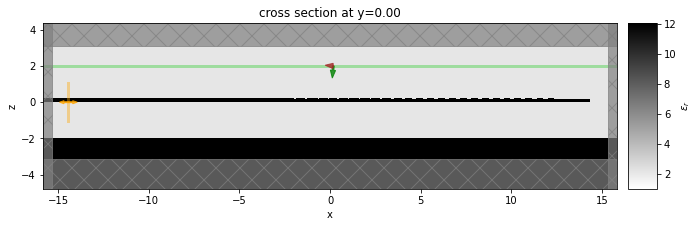

In [29]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=-5
)
f = gt.plot_simulation(sim)

2022-05-20 16:39:59.106 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:39:59.190 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


[16:39:59] INFO     Auto meshing using wavelength 1.5000 defined from        ]8;id=580840;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=287684;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 792x288 with 2 Axes>

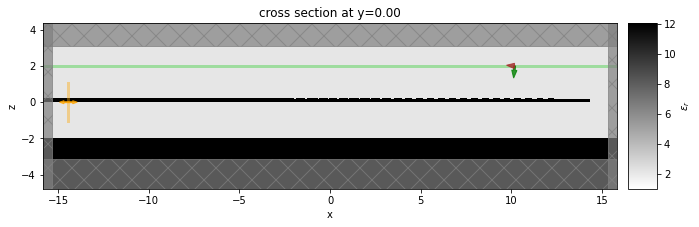

In [30]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=+5
)
f = gt.plot_simulation(sim)

In [31]:
offsets = np.arange(-5, 6, 5)

In [32]:
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-05-20 16:40:00.325 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_0f18714c.csv')


2022-05-20 16:40:00.326 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_fa46ad3e.csv')


2022-05-20 16:40:00.327 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_bb79b1d7.csv')


In [33]:
import numpy as np

log = lambda x: 20 * np.log10(x)

2022-05-20 16:40:00.415 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_fa46ad3e.csv')


2022-05-20 16:40:00.438 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_0f18714c.csv')


2022-05-20 16:40:00.444 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_bb79b1d7.csv')


<matplotlib.legend.Legend object at 0x7f60a9b2f160>

<Figure size 432x288 with 1 Axes>

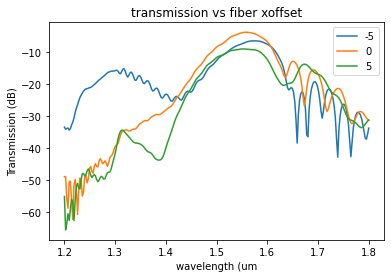

In [34]:
for offset in offsets:
    df = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(df.wavelengths, log(df.s21m), label=str(offset))

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber xoffset")
plt.legend()

In [35]:
fiber_angles = [3, 5, 7]
jobs = [
    dict(component=c, is_3d=False, fiber_angle_deg=fiber_angle_deg)
    for fiber_angle_deg in fiber_angles
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-05-20 16:40:00.662 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_bf17a658.csv')


2022-05-20 16:40:00.663 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_32f0fbcb.csv')


2022-05-20 16:40:00.663 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_99b6393f.csv')


2022-05-20 16:40:00.717 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_bf17a658.csv')


2022-05-20 16:40:00.744 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_99b6393f.csv')


2022-05-20 16:40:00.749 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_32f0fbcb.csv')


<matplotlib.legend.Legend object at 0x7f6106af0040>

<Figure size 432x288 with 1 Axes>

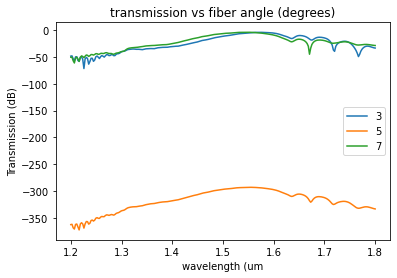

In [36]:
for fiber_angle_deg in fiber_angles:
    df = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg
    )
    plt.plot(df.wavelengths, log(df.s21m), label=str(fiber_angle_deg))

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber angle (degrees)")
plt.legend()

<Figure size 432x288 with 1 Axes>

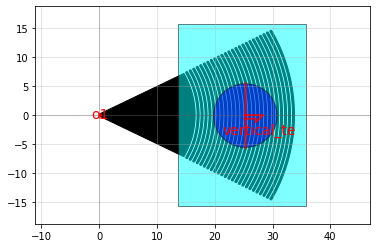

<Figure size 432x288 with 1 Axes>

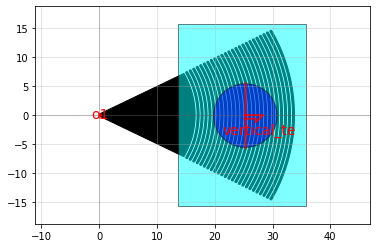

In [37]:
c = gf.components.grating_coupler_elliptical_arbitrary(
    widths=[0.343] * 25, gaps=[0.345] * 25
)
c.plot()

2022-05-20 16:40:01.356 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-05-20 16:40:01.450 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:294 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


[16:40:01] INFO     Auto meshing using wavelength 1.5000 defined from        ]8;id=45501;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=225761;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/grid/grid_spec.py#466\466]8;;\
                    sources.                                                                 

<Figure size 1584x576 with 2 Axes>

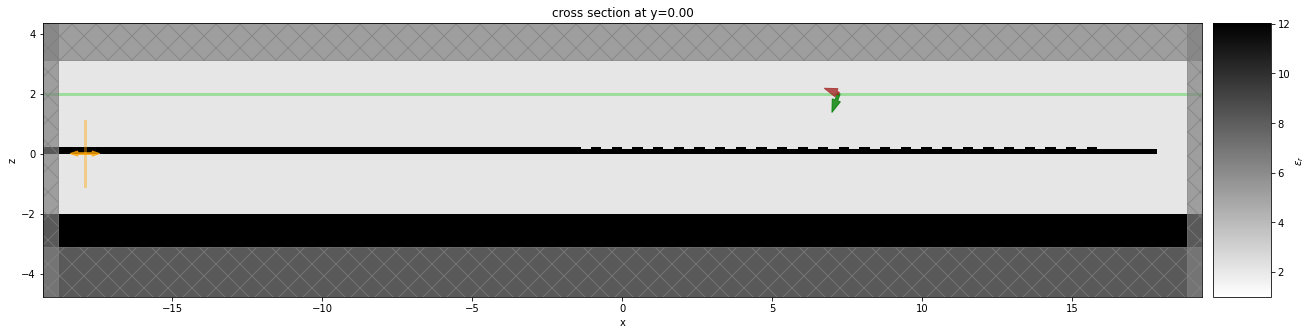

In [38]:
fiber_angle_deg = 20
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(sim, figsize=(22, 8))

In [39]:
offsets = np.arange(-10, 11, 5)
offsets

array([-10,  -5,   0,   5,  10])

In [40]:
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-05-20 16:40:02.795 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_f6411ace.csv')


2022-05-20 16:40:02.795 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_1d3226ad.csv')


2022-05-20 16:40:02.796 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_1107a179.csv')


2022-05-20 16:40:02.797 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_eb0d3d2c.csv')


2022-05-20 16:40:02.801 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_c8d7ebdd.csv')


2022-05-20 16:40:02.858 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_1d3226ad.csv')


2022-05-20 16:40:02.881 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_f6411ace.csv')


2022-05-20 16:40:02.886 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_eb0d3d2c.csv')


2022-05-20 16:40:02.891 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_1107a179.csv')


2022-05-20 16:40:02.896 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:98 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_c8d7ebdd.csv')


<matplotlib.legend.Legend object at 0x7f60a9a57100>

<Figure size 432x288 with 1 Axes>

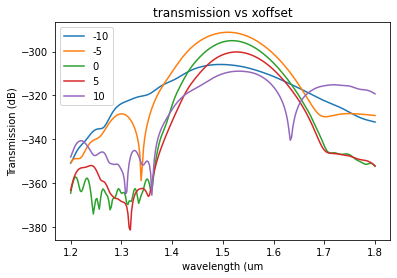

In [41]:
for offset in offsets:
    df = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(df.wavelengths, log(df.s21m), label=str(offset))

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs xoffset")
plt.legend()